In [86]:
import pandas as pd

# read data
data = pd.read_csv("data_clean.csv")

In [87]:
import re

relationship = {}
rela = data["participant_relationship"]

# iterate over relationships
for item in rela:
    # check if item is not NaN
    if pd.isna(item) == False:
        # split item on |
        item = re.split("[|]+", item)
        # iterate over splitted item
        for element in item:
            # replace :: with : because of weird thing in dataset
            element = element.replace("::", ":")
            # remove number and : from element
            element = element.split(':')[-1]
            # record in dictionary how often relationship occurs
            if element in relationship:
                relationship[element] += 1
            else:
                relationship[element] = 1
            
for item in relationship:
    print(item, relationship[item])

Family 3551
Friends 1091
Significant others - current or former 3465
Armed Robbery 7964
Neighbor 726
Home Invasion - Perp Does Not Know Victim 1374
Home Invasion - Perp Knows Victim 525
Aquaintance 1019
Gang vs Gang 587
Drive by - Random victims 43
Co-worker 139
Mass shooting - Perp Knows Victims 12
Mass shooting - Random victims 8


In [88]:
# log every item in amount of relationships
for item in relationship:
    relationship[item] = math.log10(relationship[item])
    
data = {'Relationships': relationship}

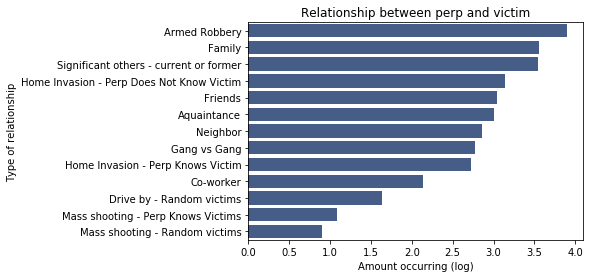

In [89]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# plot the data
df_data = pd.DataFrame(data).sort_values('Relationships', ascending=False)
fig = sns.barplot(x='Relationships', y=df_data.index, data=df_data, color=sns.xkcd_rgb["denim blue"])
plt.xlabel('Amount occurring (log)')
plt.ylabel('Type of relationship')
plt.title('Relationship between perp and victim')
plt.show(fig)

In [94]:
data = pd.read_csv("data_clean.csv")

participant_relationship = data["participant_relationship"]
date = data["date"]

rela_2014 = {}
rela_2015 = {}
rela_2016 = {}
rela_2017 = {}
rela_per_year = {'2014': rela_2014, '2015': rela_2015, '2016': rela_2016, '2017': rela_2017}
relationship_types = []

# print(date[1][:4])
# dictaa = rela_per_year[date[1][:4]]
# dictaa['Family'] = 1
# print(rela_per_year)
# print(dictaa)

for i in range(len(data)):
    # check if item is not NaN
    item = participant_relationship[i]
    if pd.isna(item) == False: 
        item = re.split("[|]+", item)
        # iterate over splitted item
        for element in item:
            # replace :: with : because of weird thing in dataset
            element = element.replace("::", ":")
            # remove number and : from element
            element = element.split(':')[-1]
            # record in dictionary how often relationship occurs
            if date[i][:4] != '2018':
                dicto = rela_per_year[date[i][:4]]
                if element in dicto:
                    dicto[element] += 1
                else:
                    dicto[element] = 1
                    if element not in relationship_types:
                        relationship_types.append(element)

In [95]:
for item in relationship_types:
    for year in rela_per_year.values():
        if item not in year:
            year[item] = 0

In [98]:
# relationship_types = sorted(relationship_types)

# sorted_rela_2014 = {}
# sorted_rela_2015 = {}
# sorted_rela_2016 = {}
# sorted_rela_2017 = {}

# sorted_rela = [sorted_rela_2014,sorted_rela_2015,sorted_rela_2016,sorted_rela_2017]

# for rtype in relationship_types:
#     sorted_rela_2014[rtype] = rela_2014[rtype]
#     sorted_rela_2015[rtype] = rela_2015[rtype]
#     sorted_rela_2016[rtype] = rela_2016[rtype]
#     sorted_rela_2017[rtype] = rela_2017[rtype]

In [103]:
year = 2014

for item in rela_per_year.values():
    print()
    print(year)
    year += 1
    for element in item:
        print(element, item[element])
        
print(sorted_rela)


2014
Family 257
Friends 119
Significant others - current or former 90
Armed Robbery 291
Neighbor 14
Home Invasion - Perp Does Not Know Victim 106
Home Invasion - Perp Knows Victim 51
Aquaintance 26
Gang vs Gang 34
Drive by - Random victims 4
Co-worker 2
Mass shooting - Perp Knows Victims 0
Mass shooting - Random victims 0

2015
Friends 446
Family 1102
Armed Robbery 2294
Significant others - current or former 759
Home Invasion - Perp Does Not Know Victim 504
Gang vs Gang 209
Home Invasion - Perp Knows Victim 189
Mass shooting - Perp Knows Victims 4
Drive by - Random victims 23
Mass shooting - Random victims 3
Aquaintance 38
Neighbor 179
Co-worker 32

2016
Family 1054
Gang vs Gang 161
Armed Robbery 2975
Friends 292
Neighbor 287
Significant others - current or former 1205
Home Invasion - Perp Does Not Know Victim 447
Home Invasion - Perp Knows Victim 154
Aquaintance 423
Co-worker 50
Mass shooting - Perp Knows Victims 3
Drive by - Random victims 3
Mass shooting - Random victims 1

2017
Si

In [109]:
data = {'fruits' : ['2014','2015','2016','2017']}

for item in relationship_types:
    data[item] = []
    for element in rela_per_year:
        data[item].append(rela_per_year[element][item])

{'fruits': dict_keys(['2014', '2015', '2016', '2017'])}
{'fruits': dict_keys(['2014', '2015', '2016', '2017']), 'Aquaintance': [26, 38, 423, 450], 'Armed Robbery': [291, 2294, 2975, 2083], 'Co-worker': [2, 32, 50, 40], 'Drive by - Random victims': [4, 23, 3, 9], 'Family': [257, 1102, 1054, 947], 'Friends': [119, 446, 292, 197], 'Gang vs Gang': [34, 209, 161, 144], 'Home Invasion - Perp Does Not Know Victim': [106, 504, 447, 249], 'Home Invasion - Perp Knows Victim': [51, 189, 154, 113], 'Mass shooting - Perp Knows Victims': [0, 4, 3, 5], 'Mass shooting - Random victims': [0, 3, 1, 3], 'Neighbor': [14, 179, 287, 215], 'Significant others - current or former': [90, 759, 1205, 1139]}


In [114]:
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure
import seaborn as sns

fruits = ['2014','2015','2016','2017']
years = relationship_types
colors = ['red','blue','green','red','blue','green','red','blue','green','red','blue','green','yellow']

# data = {'fruits' : fruits,
#         '2015'   : [2, 1, 4, 3, 2, 4],
#         '2016'   : [5, 3, 4, 2, 4, 6],
#         '2017'   : [3, 2, 4, 4, 5, 3]
#         }
data = {'fruits' : ['2014','2015','2016','2017']}

for item in relationship_types:
    data[item] = []
    for element in rela_per_year:
        data[item].append(rela_per_year[element][item])

p = figure(x_range=fruits, plot_height=1000, title="Fruit Counts by Year",
           toolbar_location=None, tools="")

p.vbar_stack(years, x='fruits', width=0.9, color=colors, source=data,
             legend=[value(x) for x in years])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

